<a href="https://colab.research.google.com/github/lipeng2021/-python1/blob/main/%E8%8C%83%E6%95%B0%E6%AD%A3%E5%88%99%E5%8C%96%E5%AE%9E%E9%AA%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [166]:
import torch
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

In [167]:
num_train =20
num_test = 100
num_inputs = 200
true_w = torch.ones(num_inputs,1)*0.01
true_b = 0.05
features = torch.randn((num_train+num_test,num_inputs))
labels = torch.matmul(features,true_w)+true_b
labels += torch.tensor(np.random.normal(0,0.01,size=labels.size()),dtype=torch.float)
train_features,train_labels = features[:num_train,:],labels[:num_train]
test_features,test_labels = features[num_train:,:],labels[num_train:]

In [168]:
def init_params():
  w = torch.randn((num_inputs,1),requires_grad=True)
  b = torch.zeros(1,requires_grad=True)
  return [w,b]

In [169]:
def penalty(w):
  return (w**2).sum()/2

In [170]:
def linreg(X,w,b):
  y = torch.mm(X,w)+b
  return y

In [171]:
def squared_loss(y_hat,y):
  return (y_hat-y.view(y_hat.size())) ** 2/2

In [172]:
def sgd(params,lr,batch_size):
  for param in params:
    param.data -= lr * param.grad /batch_size

In [176]:
def set_svg_figure():
  display.set_matplotlib_formats('svg')
def set_figsize(figsize=(3.5,2.5)):
  set_svg_figure()
  plt.rcParams['figure.figsize']=figsize
def semilogy(x_vals,y_vals,x_label,y_label,x2_vals=None,y2_vals=None,legend=None,figsize=(3.5,2.5)):
  set_figsize(figsize)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.semilogy(x_vals,y_vals)
  if x2_vals and y2_vals:
    plt.semilogy(x2_vals,y2_vals,linestyle=':')
    plt.legend(legend)

In [202]:
batch_size = 1
num_epochs = 100
lr = 0.003
net = linreg
loss = squared_loss
dataset = torch.utils.data.TensorDataset(train_features,train_labels)
train_iter = torch.utils.data.DataLoader(dataset,batch_size,shuffle=True)

def fit_and_plot(lambd):
  w,b = init_params()
  train_ls = []
  test_ls = []
  for epoch in range(num_epochs):
    for X,y in train_iter:
      y_hat = net(X,w,b)
      l = loss(y_hat,y).sum()

      l = (loss(y_hat,y)+lambd*penalty(w)).sum() 
      if w.grad is not None:
        w.grad.data.zero_()
        b.grad.data.zero_()
      l.backward()
      sgd([w,b],lr,batch_size)
    train_ls.append(loss(net(train_features,w,b),train_labels).mean().item())
    test_ls.append(loss(net(test_features,w,b),test_labels).mean().item())
  semilogy(range(1,num_epochs+1),train_ls,'epochs','loss',range(1,num_epochs+1),test_ls,['train','test'])
  print('L2 norm of w',w.norm().item())

L2 norm of w 12.926616668701172


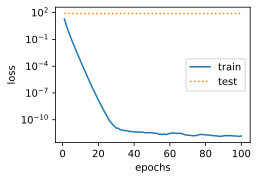

In [204]:
fit_and_plot(lambd=0)

L2 norm of w 0.03187340497970581


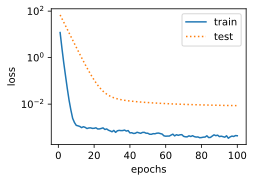

In [205]:
fit_and_plot(lambd=3)

L2 norm of w 0.015741821378469467


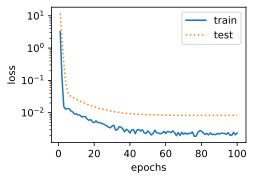

In [206]:
fit_and_plot(lambd=15)